# AirBnB 2020

## 1. Importing Libraries and Data

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets

In [2]:
df = pd.read_csv(r'C:\Users\jennb\OneDrive\Documents\Springboard\Capstone Project 2\AB_US_2020.csv', header=0)
# Upon checking the data, there are some missing values.
df.head()

C:\Users\jennb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,State
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville,North Carolina
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,Asheville,North Carolina
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville,North Carolina
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville,North Carolina
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville,North Carolina


In [3]:
# Let's check the number of columns and rows and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [4]:
# Some of these columns may not be relevant to data analysis. But we want to check how may unique groups 
# are there in each column particulary, the type of room, neighborhood and neighborhood group.
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [5]:
# neighbourhood column consist of data in different format (zip code, name and district)
df['neighbourhood'].unique()

array(['28804', '28801', '28806', ..., 'Near Southeast, Navy Yard',
       'Eastland Gardens, Kenilworth',
       'Woodland/Fort Stanton, Garfield Heights, Knox Hill'], dtype=object)

In [6]:
df['neighbourhood_group'].unique()

array([nan, 'Hawaii', 'Kauai', 'Maui', 'Honolulu', 'Other Cities',
       'City of Los Angeles', 'Unincorporated Areas', 'Manhattan',
       'Brooklyn', 'Queens', 'Staten Island', 'Bronx', 'Providence',
       'Washington', 'Newport', 'Bristol', 'Kent', 'Central Area',
       'Other neighborhoods', 'West Seattle', 'Downtown', 'Ballard',
       'Capitol Hill', 'Beacon Hill', 'Seward Park', 'Queen Anne',
       'Rainier Valley', 'Lake City', 'Cascade', 'Delridge',
       'University District', 'Northgate', 'Magnolia', 'Interbay'],
      dtype=object)

In [7]:
df['city'].unique()

array(['Asheville', 'Austin', 'Boston', 'Broward County', 'Cambridge',
       'Chicago', 'Clark County', 'Columbus', 'Denver', 'Hawaii',
       'Jersey City', 'Los Angeles', 'Nashville', 'New Orleans',
       'New York City', 'Oakland', 'Pacific Grove', 'Portland',
       'Rhode Island', 'Salem', 'San Clara Country', 'San Diego',
       'San Francisco', 'San Mateo County', 'Santa Cruz County',
       'Seattle', 'Twin Cities MSA', 'Washington D.C.'], dtype=object)

## 2. Data Cleansing

In [8]:
# Let's check how many missing values are there and which columns have missing values
df.isnull().sum()
# Name and host name are not necessary for data analysis.
# Half of the rows (115845) in the neighbourhood_group are missing.
# last_review are all dates and has 48602 missing rows

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
State                                  0
dtype: int64

In [9]:
# I decided to drop name, host_name, neighbourhood_group and last_review due to missing values
# Neighborhood column has no missing values but consists of data in different format 
# (zip code, name and district). This column will also be dropped.

df.drop(['name', 'host_name','neighbourhood','neighbourhood_group','last_review'],axis = 1,inplace=True)
df.head()

,id,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city,State
0,38585,165529,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville,North Carolina
1,80905,427027,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville,North Carolina
2,108061,320564,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville,North Carolina
3,155305,746673,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville,North Carolina
4,160594,769252,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville,North Carolina


In [10]:
# reviews_per_month might give me some relevant analysis so I replaced the missing values by 0
df['reviews_per_month'].fillna(0,inplace=True)

In [11]:
# The data now is dropped to 12 columns and there are no missing values.
df.isnull().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
State                             0
dtype: int64

In [12]:
# Checking the descriptive stats of each colums
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   host_id                         226030 non-null  int64  
 2   latitude                        226030 non-null  float64
 3   longitude                       226030 non-null  float64
 4   room_type                       226030 non-null  object 
 5   price                           226030 non-null  int64  
 6   minimum_nights                  226030 non-null  int64  
 7   number_of_reviews               226030 non-null  int64  
 8   reviews_per_month               226030 non-null  float64
 9   calculated_host_listings_count  226030 non-null  int64  
 10  availability_365                226030 non-null  int64  
 11  city                            226030 non-null  object 
 12  State           

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,226030.000000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.123653,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.603074,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.040000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.420000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,1.620000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.060000,593.000000,365.000000


In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,226030.000000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.123653,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.603074,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.040000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.420000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,1.620000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.060000,593.000000,365.000000


In [14]:
#By checking the statistics of each columns, there are extraneous values that need to be dropped/filter
# Let's explore the frequency
df.price.value_counts()


100     5826
150     5722
75      4710
50      4401
80      3908
        ... 
1236       1
1364       1
1620       1
1876       1
2047       1
Name: price, Length: 1975, dtype: int64

In [15]:
filt = (df.price == 0) | (df.price == 1)
df[filt]

,id,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city,State
6152,20654658,18827179,30.19341,-97.79261,Private room,1,1,0,0.00,2,0,Austin,Texas
6156,20674436,3594051,30.23816,-97.74314,Entire home/apt,1,2,2,0.05,1,0,Austin,Texas
6174,20708014,22987908,30.35677,-97.73947,Private room,1,1,0,0.00,1,0,Austin,Texas
6197,20780987,129897901,30.35793,-97.70763,Private room,1,1,1,0.03,1,0,Austin,Texas
11106,42738847,314291208,30.30181,-97.82910,Hotel room,0,1,0,0.00,1,0,Austin,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204886,20309326,68252876,37.04558,-122.01952,Shared room,0,1,16,0.45,3,0,Santa Cruz County,California
208180,18670293,7916599,47.61545,-122.31687,Entire home/apt,0,30,6,0.16,1,363,Seattle,Washington
208276,19293242,69342526,47.65192,-122.38440,Entire home/apt,0,30,12,0.35,2,0,Seattle,Washington
213522,18788189,30129304,44.96210,-93.19214,Private room,0,2,0,0.00,1,0,Twin Cities MSA,Minneapolis


In [16]:
# Let's exclude prices 0 or 1
df = df[~filt]

In [17]:
df.minimum_nights.value_counts()

1      60379
2      54738
30     33527
3      30928
4       9513
       ...  
49         1
345        1
229        1
102        1
456        1
Name: minimum_nights, Length: 169, dtype: int64

In [18]:
# Let's select the minimum nights to a maximum of 30 days
filt = df.minimum_nights >= 31
df = df[~filt]

In [19]:
df.availability_365.value_counts()

0      55912
365    11578
364     4670
89      3895
179     3419
       ...  
197      136
190      132
205      130
199      119
215      119
Name: availability_365, Length: 366, dtype: int64

In [20]:
#There are 55912 rows with 0 availability. Let's exclude these rows
filt = df.availability_365 != 0
df = df[filt]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161056 entries, 1 to 226029
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              161056 non-null  int64  
 1   host_id                         161056 non-null  int64  
 2   latitude                        161056 non-null  float64
 3   longitude                       161056 non-null  float64
 4   room_type                       161056 non-null  object 
 5   price                           161056 non-null  int64  
 6   minimum_nights                  161056 non-null  int64  
 7   number_of_reviews               161056 non-null  int64  
 8   reviews_per_month               161056 non-null  float64
 9   calculated_host_listings_count  161056 non-null  int64  
 10  availability_365                161056 non-null  int64  
 11  city                            161056 non-null  object 
 12  State           

## 3. Exploring and Visualizing Data

In [22]:
# Let's count the number of rows in each room type
room_count = df.groupby('room_type').agg(['count'])
room_count.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city,State
,count,count,count,count,count,count,count,count,count,count,count,count
room_type,,,,,,,,,,,,
Entire home/apt,113485,113485,113485,113485,113485,113485,113485,113485,113485,113485,113485,113485
Hotel room,1738,1738,1738,1738,1738,1738,1738,1738,1738,1738,1738,1738
Private room,42923,42923,42923,42923,42923,42923,42923,42923,42923,42923,42923,42923
Shared room,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910,2910


In [23]:
# Assign index number in each room type. This will be plotted on the x-axis on the bar chart.
room_count.index

Index(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [24]:
# This will be plotted on the y-axis.
room_count['id']['count'].sort_values(ascending=False)

room_type
Entire home/apt    113485
Private room        42923
Shared room          2910
Hotel room           1738
Name: count, dtype: int64

(0.0, 140000.0)

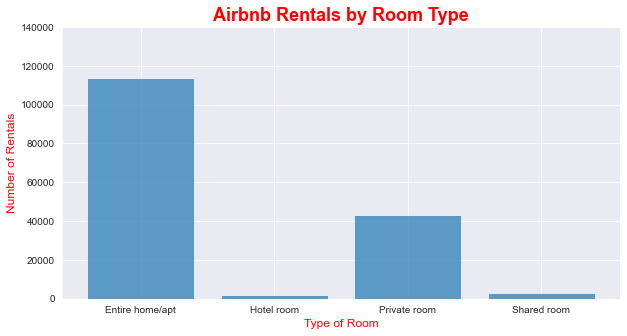

In [25]:
mpl.rcParams['figure.figsize']=(10,5)
sns.set_style('darkgrid')

plt.rcParams['axes.axisbelow'] = True
plt.grid(b=True,which ='major',axis='y')

plt.bar(x=room_count.index, height=room_count['id']['count'], alpha=.7,)
plt.xlabel('Type of Room',color='r',fontsize=12)
plt.ylabel('Number of Rentals',color='r',fontsize=12)
plt.title('Airbnb Rentals by Room Type',color='r',fontsize='18',fontweight='bold')

plt.ylim(0,140000)

In [26]:
city_count = df.groupby('city').agg(['count'])
city_count.head()

,id,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,State
,count,count,count,count,count,count,count,count,count,count,count,count
city,,,,,,,,,,,,
Asheville,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
Austin,6266,6266,6266,6266,6266,6266,6266,6266,6266,6266,6266,6266
Boston,1798,1798,1798,1798,1798,1798,1798,1798,1798,1798,1798,1798
Broward County,9315,9315,9315,9315,9315,9315,9315,9315,9315,9315,9315,9315
Cambridge,467,467,467,467,467,467,467,467,467,467,467,467


In [27]:
city_count['id']['count'].sort_values(ascending=False)

city
New York City        24939
Los Angeles          22401
Hawaii               20285
Broward County        9315
San Diego             8979
Clark County          7674
Austin                6266
New Orleans           5454
San Clara Country     5311
San Francisco         5198
Nashville             5089
Chicago               4759
Washington D.C.       4756
Seattle               4424
Twin Cities MSA       3870
Portland              3492
Rhode Island          3204
Denver                2866
San Mateo County      2406
Jersey City           1974
Oakland               1848
Boston                1798
Asheville             1700
Columbus              1152
Santa Cruz County     1150
Cambridge              467
Salem                  146
Pacific Grove          133
Name: count, dtype: int64

(0.0, 30000.0)

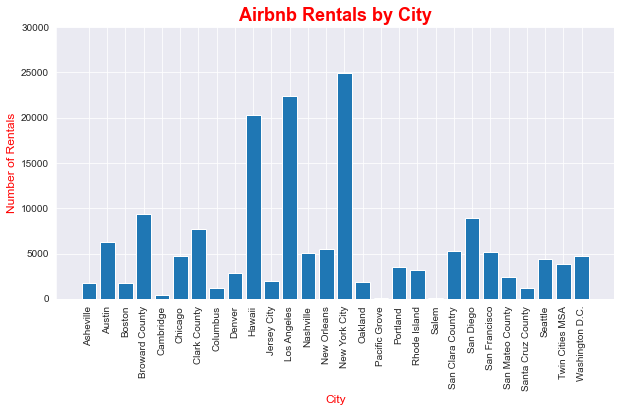

In [28]:
sns.set_style('darkgrid')

plt.rcParams['axes.axisbelow'] = True
plt.grid(b=True,which ='major',axis='x')

plt.bar(x=city_count.index,height=city_count['id']['count'],alpha=1)
plt.xlabel('City',color='r',fontsize=12)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Rentals',color='r',fontsize=12)
plt.title('Airbnb Rentals by City',color='r',fontsize='18',fontweight='bold')

plt.ylim(0,30000)

Text(0.5, 0, '-- Type of Room --')

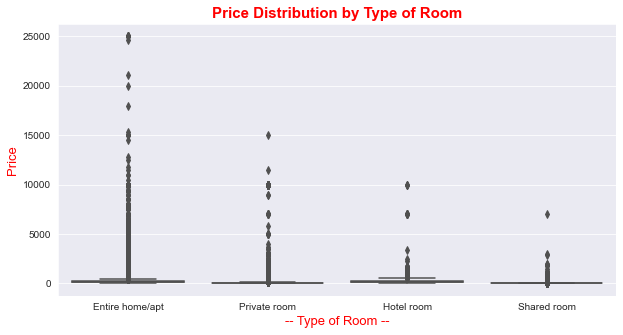

In [29]:
#Let's explore the price distribution according to the type of room
sns.set_style('darkgrid')
box_price = sns.boxplot(x='room_type',y='price',data=df,palette='rainbow',showfliers=True)
box_price.set_title('Price Distribution by Type of Room',fontsize=15,color='r', fontweight='bold')
box_price.set_ylabel('Price',color='r', fontsize=13)
box_price.set_xlabel('-- Type of Room --',color='r',fontsize=13)

In [30]:
# I chose median to represent the average price since the distribution is not normal
avg_by_room = df.groupby(['room_type']).median()
avg_price_by_room_sorted= avg_by_room['price'].sort_values(ascending=False)
avg_price_by_room_sorted

room_type
Hotel room         175
Entire home/apt    157
Private room        68
Shared room         35
Name: price, dtype: int64

(0.0, 250.0)

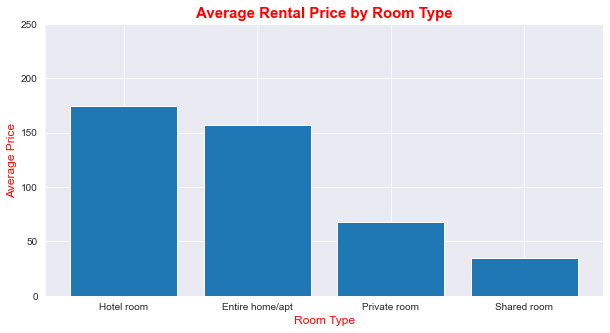

In [31]:
# Create a bar plot
sns.set_style('darkgrid')

plt.bar(x=avg_price_by_room_sorted.index, height=avg_price_by_room_sorted)

plt.title('Average Rental Price by Room Type',color='r',fontsize=15,fontweight='bold')
plt.xlabel('Room Type',color='r',fontsize=12)
plt.ylabel('Average Price',color='r',fontsize=12)
plt.ylim(0,250)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

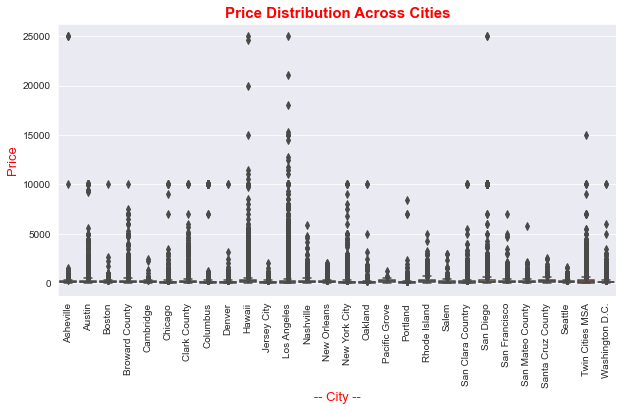

In [32]:
#Exploring the prices in each city, the distribution is skewed due to outliers.

sns.set_style('darkgrid')
box_price = sns.boxplot(x='city',y='price',data=df,palette='rainbow',showfliers=True)
box_price.set_title('Price Distribution Across Cities',fontsize=15,color='r', fontweight='bold')
box_price.set_ylabel('Price',color='r', fontsize=13)
box_price.set_xlabel('-- City --',color='r',fontsize=13)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

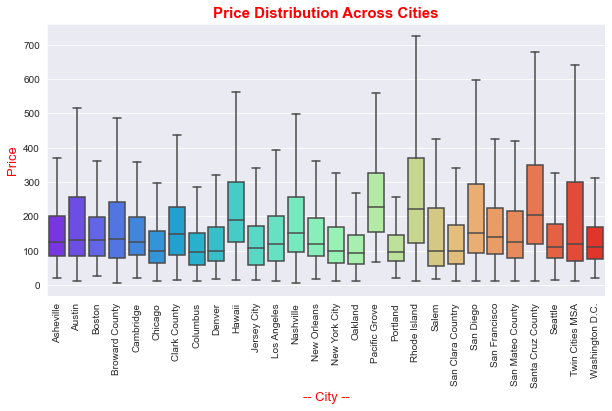

In [33]:
# In order for the data to look clean that we can make better sense of the distribution,
# outliers are removed
sns.set_style('darkgrid')
box_price = sns.boxplot(x='city',y='price',data=df,palette='rainbow',showfliers=False)
box_price.set_title('Price Distribution Across Cities',fontsize=15,color='r', fontweight='bold')
box_price.set_ylabel('Price',color='r', fontsize=13)
box_price.set_xlabel('-- City --',color='r',fontsize=13)
plt.xticks(rotation='vertical')


In [34]:
# Since the price distribution in each city are not normal, 
# we will use the median to represent the average price
avg_by_city = df.groupby(['city']).median()
avg_price_by_city_sorted= avg_by_city['price'].sort_values(ascending=False)
avg_price_by_city_sorted

city
Pacific Grove        227.0
Rhode Island         220.5
Santa Cruz County    202.5
Hawaii               189.0
Nashville            152.0
San Diego            150.0
Clark County         147.0
San Francisco        139.0
Broward County       135.0
Austin               131.0
Boston               130.0
San Mateo County     125.0
Cambridge            125.0
Asheville            124.5
New Orleans          120.0
Twin Cities MSA      120.0
Los Angeles          118.0
Seattle              111.0
Washington D.C.      109.0
Jersey City          108.0
New York City        100.0
Denver               100.0
Chicago              100.0
Salem                100.0
San Clara Country    100.0
Columbus              95.0
Portland              95.0
Oakland               93.5
Name: price, dtype: float64

(0.0, 250.0)

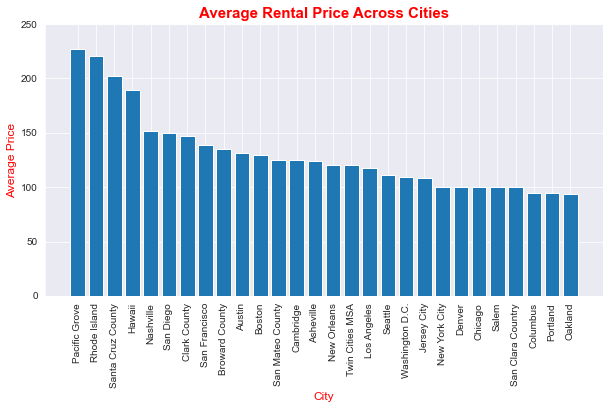

In [35]:
sns.set_style('darkgrid')

plt.bar(x=avg_price_by_city_sorted.index, height=avg_price_by_city_sorted)

plt.title('Average Rental Price Across Cities',color='r',fontsize=15,fontweight='bold')
plt.xlabel('City',color='r',fontsize=12)
plt.xticks(rotation='vertical')
plt.ylabel('Average Price',color='r',fontsize=12)
plt.ylim(0,250)

Text(0.5, 1.0, 'Availability of Airbnb Rentals')

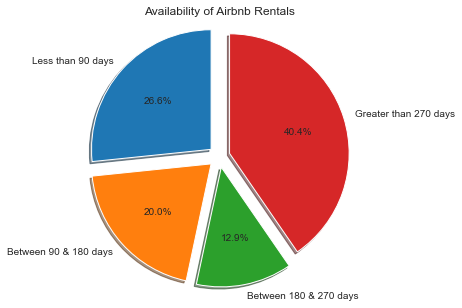

In [36]:
# Rentals that are not available (0) were excluded in this pie chart.
a_avail = df[df['availability_365']<=90].count()[0]
b_avail = df[(df['availability_365']>90) & (df['availability_365']<=180)].count()[0]
c_avail = df[(df['availability_365']>180) & (df['availability_365']<=270)].count()[0]
d_avail = df[(df['availability_365']>270)].count()[0]
labels = 'Less than 90 days','Between 90 & 180 days','Between 180 & 270 days','Greater than 270 days'
sizes = a_avail,b_avail,c_avail,d_avail
explode = (.1,.1,.1,.1)

availability_pie = plt.pie(sizes,labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',radius=1.1)
plt.title('Availability of Airbnb Rentals')

In [37]:
# Let's see who are the top 10 host listers
df['host_id'].value_counts().head(10)

107434423    988
48005494     862
359036978    496
8534462      297
359066913    282
2154262      282
9419684      263
194953121    256
30283594     252
111808435    252
Name: host_id, dtype: int64

(0.0, 1200.0)

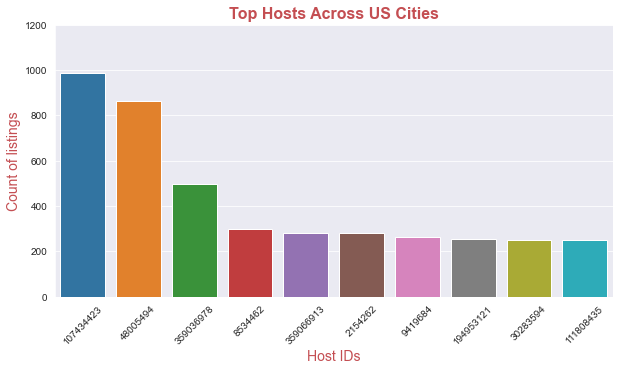

In [38]:
a = df['host_id'].value_counts()
top_host_values = a[0:10]
top_host_index = a[0:10].index

host_chart = sns.barplot(y=top_host_values,x=top_host_index,order=top_host_index)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(8,8)})

host_chart.set_xticklabels(host_chart.get_xticklabels(), rotation=45)


host_chart.set_title('Top Hosts Across US Cities',color='r',fontsize=16,fontweight='bold')
host_chart.set_ylabel('Count of listings',color='r',fontsize=14)
host_chart.set_xlabel('Host IDs',color='r',fontsize=14)
plt.ylim(0,1200)


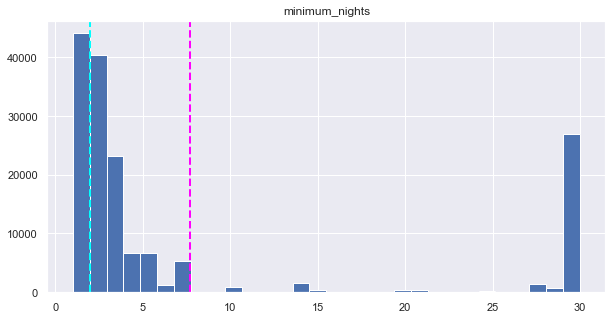

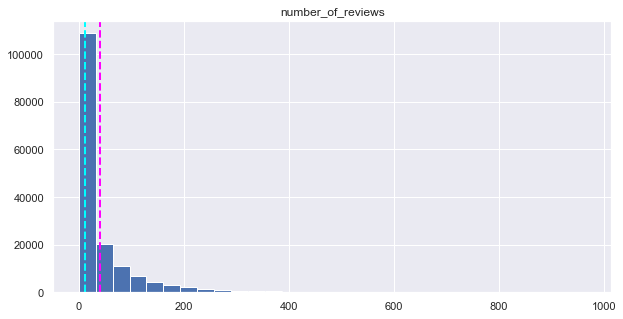

In [39]:
# Plot a histogram for each numeric feature

numeric_features = ['minimum_nights','number_of_reviews']

for col in numeric_features:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=30, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [40]:
avg_reviews_per_month = df.groupby(['city']).mean()
avg_reviews_per_month_by_city_sorted= avg_by_city['reviews_per_month'].sort_values(ascending=False)
avg_reviews_per_month_by_city_sorted

city
Asheville            2.180
Columbus             1.895
Portland             1.805
Nashville            1.580
Cambridge            1.380
Denver               1.350
New Orleans          1.290
Seattle              1.240
Santa Cruz County    1.185
Chicago              1.100
Boston               1.010
San Mateo County     0.990
San Diego            0.980
Salem                0.815
Oakland              0.730
Washington D.C.      0.725
Pacific Grove        0.700
Los Angeles          0.670
Austin               0.640
San Clara Country    0.610
Jersey City          0.610
Rhode Island         0.555
Twin Cities MSA      0.550
Broward County       0.540
Clark County         0.525
New York City        0.420
San Francisco        0.330
Hawaii               0.280
Name: reviews_per_month, dtype: float64

(0.0, 4.0)

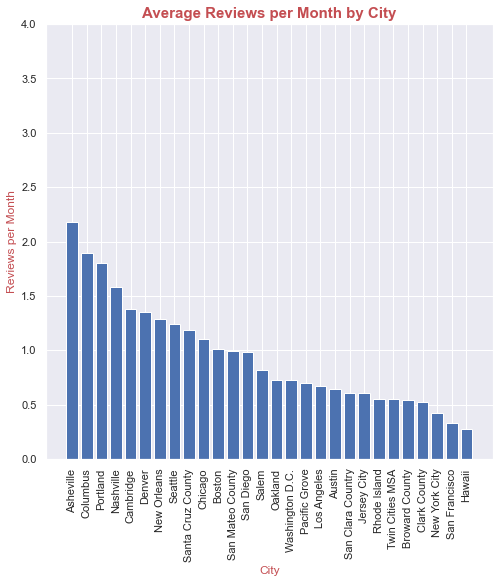

In [41]:
sns.set_style('darkgrid')

plt.bar(x=avg_reviews_per_month_by_city_sorted.index, height=avg_reviews_per_month_by_city_sorted)

plt.title('Average Reviews per Month by City',color='r',fontsize=15,fontweight='bold')
plt.xlabel('City',color='r',fontsize=12)
plt.xticks(rotation='vertical')
plt.ylabel('Reviews per Month',color='r',fontsize=12)
plt.ylim(0,4)

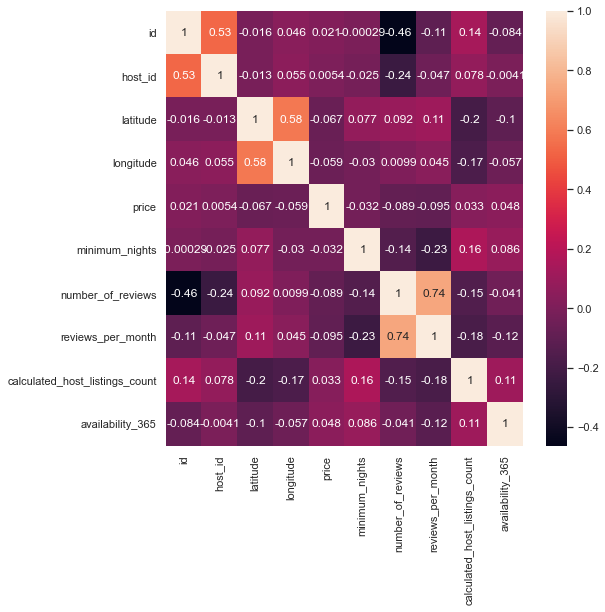

In [42]:
# Checking correlation between variables
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

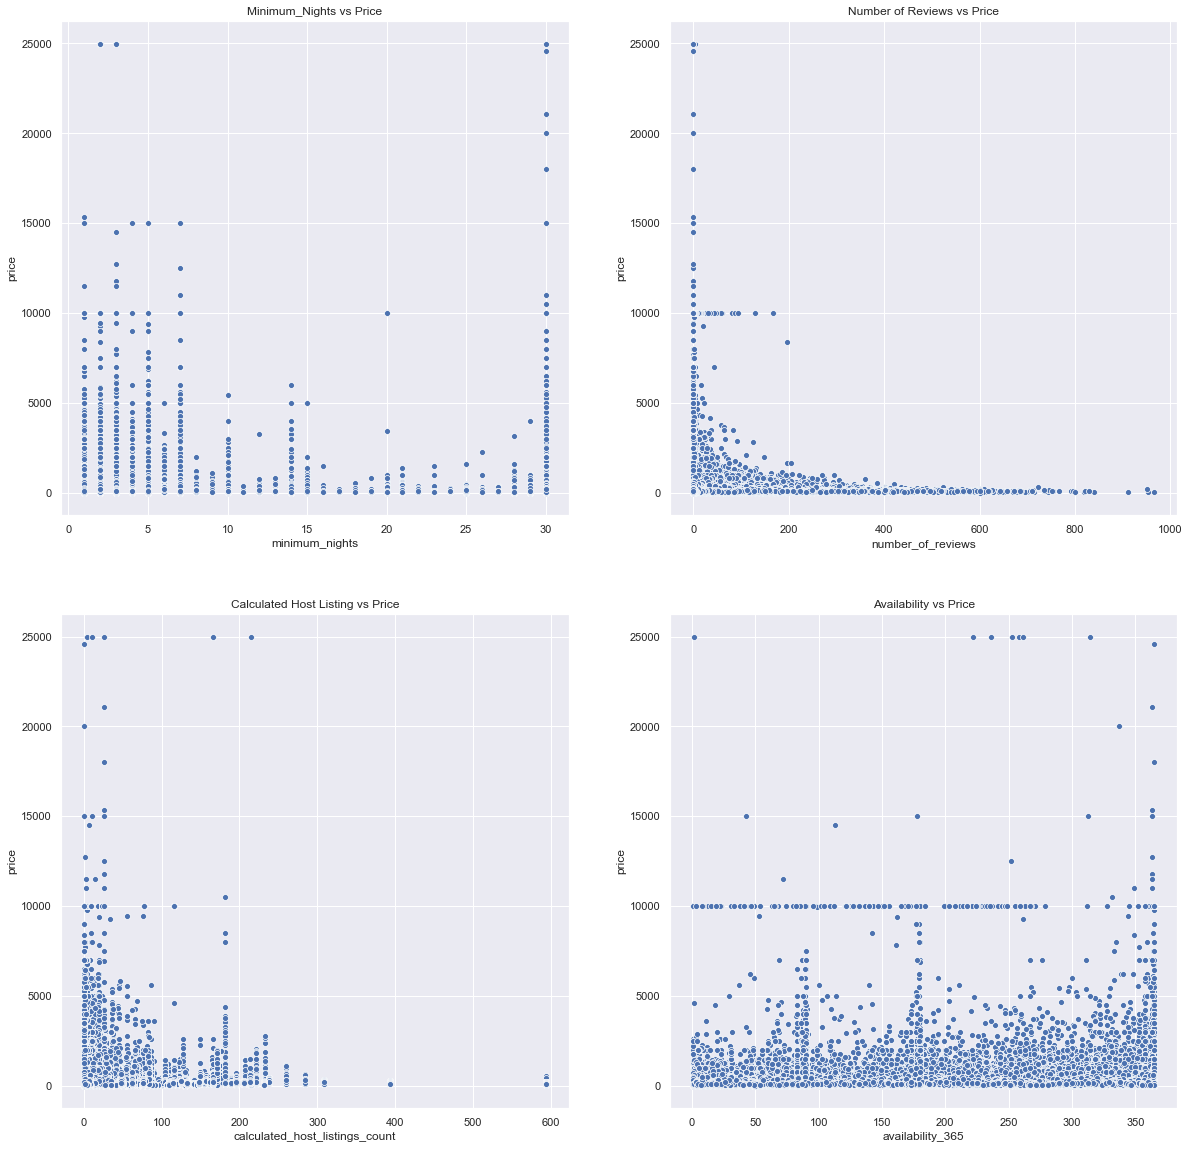

In [43]:
# Scatterplots of numeric independent variables (minimum nights, number of reviews, calculcated host listings and availability)
# with the dependent variable (price)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(20,20))

ax1.set_title('Minimum_Nights vs Price')
sns.scatterplot(x='minimum_nights', y='price', data=df, ax=ax1)

ax2.set_title('Number of Reviews vs Price')
sns.scatterplot(x='number_of_reviews', y='price', data=df, ax=ax2)

ax3.set_title('Calculated Host Listing vs Price')
sns.scatterplot(x='calculated_host_listings_count',y='price', data=df, ax=ax3)

ax4.set_title('Availability vs Price')
sns.scatterplot(x='availability_365',y='price',data=df, ax=ax4)

In [45]:
# Finding the line of best fit using linear regression
Y = df['price']
X = df[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
X = sm.add_constant(X)
OLSmodel = sm.OLS(Y,X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.params
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     489.4
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:30:12   Log-Likelihood:            -1.2364e+06
No. Observations:              161056   AIC:                         2.473e+06
Df Residuals:                  161050   BIC:                         2.473e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            248.2954      3.121     79.558      0.000     242.178     254.412
minimum_nights                    -3.0046      0.126    -23.904      0.000      -3.251      -2.758
number_of_reviews                 -0.3064      0.028    -10.820      0.000      -0.362      -0.251
reviews_per_month                -22.0396      1.161    -18.990      0.000     -24.314     -19.765
calculated_host_listings_count     0.1881      0.024      7.722      0.000       0.140       0.236
availability_365                   0.1775      0.011     16.332      0.000       0.156       0.199
==============================================================================
Omnibus:                   330139.495   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1529108103.787
Skew:                          17.239   Prob(JB):                         0.00
Kurtosis:                     479.103   Cond. No.                         601.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Insights

#### 1. The data set were cleaned and filtered to the following conditions:
       a. Prices are not 0 or 1
       b. Zero availability rentals were excluded
       c. Minimum nights are at most 30 days 
#### 2. After the outliers were removed, the distribution of prices when grouped according to the type of room and cities are not normally distributed. So, median was used to represent the average price.
#### 3. Among the numerical variables in the correlation matrix, there is a strong positive correlation between the number of reviews and reviews per month. This makes sense, rentals getting a high number of reviews will definitely have a higher number of reviews per month.
#### 4. Minimum nights, number of reviews, calculated host listing count and availability were chosen to be independent variables or predictors of the price. The adjusted R (0.013) did not show any strong association between the predictors and the price. The p-value(0.000) of each variable to the price is significant.

#### 5. The equation of the line y_predict = -2.5988*minimum_nights - 0.6984*number_of_reviews + 0.2175*calculated_host_listing_count + 0.2012*availability_365

